In [1]:
import scipy.io as sio

In [8]:
mat_data = sio.loadmat(r'C:\Users\medici\901\학습용 데이터1\내륜결함\1.mat')

In [9]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct  8 18:13:58 2024',
 '__version__': '1.0',
 '__globals__': [],
 'fs': array([[25600]], dtype=uint16),
 'signal': array([[-0.20226767],
        [-0.35395942],
        [-0.11909487],
        ...,
        [ 0.00184211],
        [-0.21885705],
        [ 0.00095067]])}

In [10]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fs', 'signal'])

In [12]:
len(mat_data.items())

5

In [13]:
signal_data = mat_data['signal']

In [15]:
print(signal_data)

[[-0.20226767]
 [-0.35395942]
 [-0.11909487]
 ...
 [ 0.00184211]
 [-0.21885705]
 [ 0.00095067]]


In [16]:
print(signal_data.shape)

(25600, 1)


In [17]:
mat2_data = sio.loadmat(r'C:\Users\medici\901\학습용 데이터1\내륜결함\2.mat')

In [18]:
signal2_data = mat2_data['signal']

In [19]:
print(signal2_data.shape)

(25600, 1)


In [21]:
import pandas as pd
import os

folder_path = r"C:\Users\medici\901"
file_name = "learning1_data.csv"
file_path = os.path.join(folder_path, file_name)

data1 = pd.read_csv(file_path)

print(data1.head())


          0         1         2         3         4         5         6  \
0 -0.202268 -0.353959 -0.119095  0.247844  0.120783 -0.263038 -0.537206   
1  0.809660  0.977984 -0.025524 -1.094791 -1.556198 -0.060669  1.057084   
2 -0.283242 -0.188273 -0.175738 -0.118942 -0.096620  0.050365 -0.066805   
3  0.144290  0.030802  0.245908  0.400738  0.250939  0.376150 -0.265817   
4  0.147031  0.113169  0.218939 -0.442279 -0.780985 -0.673755 -0.355651   

          7         8         9  ...     25591     25592     25593     25594  \
0 -0.576838 -0.453532 -0.279206  ...  0.071124  0.173103  0.548901  0.481414   
1  0.878002  0.246451 -0.800890  ... -0.246382  0.358700  0.048618 -0.172239   
2 -0.234286  0.166423  0.164054  ... -0.197872  0.999439  0.847681  0.051769   
3  0.010329  0.693247 -0.277882  ... -0.855152 -1.051428 -1.167517 -1.048143   
4 -0.073637 -0.030152  0.159664  ... -0.257708 -0.140300  0.295603 -0.060675   

      25595     25596     25597     25598     25599  fault_type  
0 

In [8]:
data1.isnull().sum()

0             0
1             0
2             0
3             0
4             0
             ..
25597         0
25598         0
25599         0
fs            0
fault_type    0
Length: 25602, dtype: int64

In [9]:
# 각 열의 null 개수를 계산하고 내림차순으로 정렬
null_counts_sorted = data1.isnull().sum().sort_values(ascending=False)

# 출력
print(null_counts_sorted)


fault_type    0
0             0
25585         0
25584         0
25583         0
             ..
6             0
5             0
4             0
3             0
2             0
Length: 25602, dtype: int64


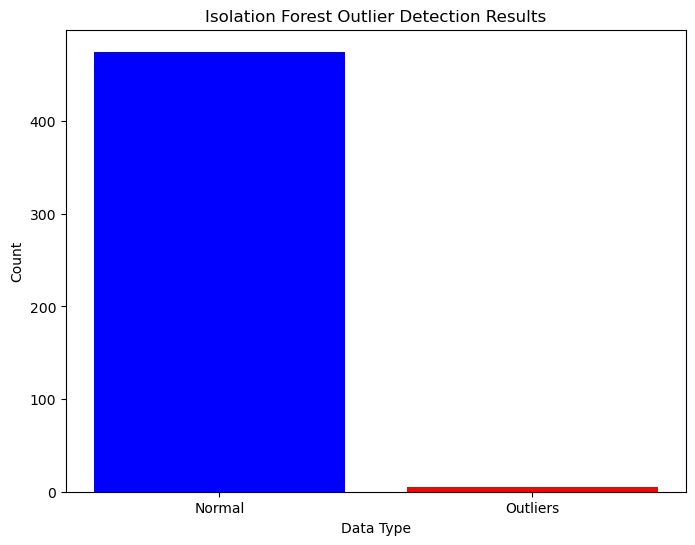

In [11]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Isolation Forest 모델 설정 및 학습
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1%의 이상치 탐지
outliers = iso_forest.fit_predict(data1)

# 이상치 처리: 이상치(-1)와 정상치(1)로 분류된 결과를 데이터 프레임에 추가
data1['Outlier'] = outliers

# 이상치 데이터와 정상 데이터를 구분하여 시각화/분석 준비
outlier_data = data1[data1['Outlier'] == -1]
normal_data = data1[data1['Outlier'] == 1]

# 결과 반환
len(outlier_data), len(normal_data)
# 시각화 - 이상치와 정상치 개수 시각화
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Outliers'], [len(normal_data), len(outlier_data)], color=['blue', 'red'])
plt.title('Isolation Forest Outlier Detection Results')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

In [12]:
# 결과 반환
len(outlier_data), len(normal_data)

(5, 475)

In [13]:
outlier_data.index

Index([285, 298, 307, 326, 359], dtype='int64')

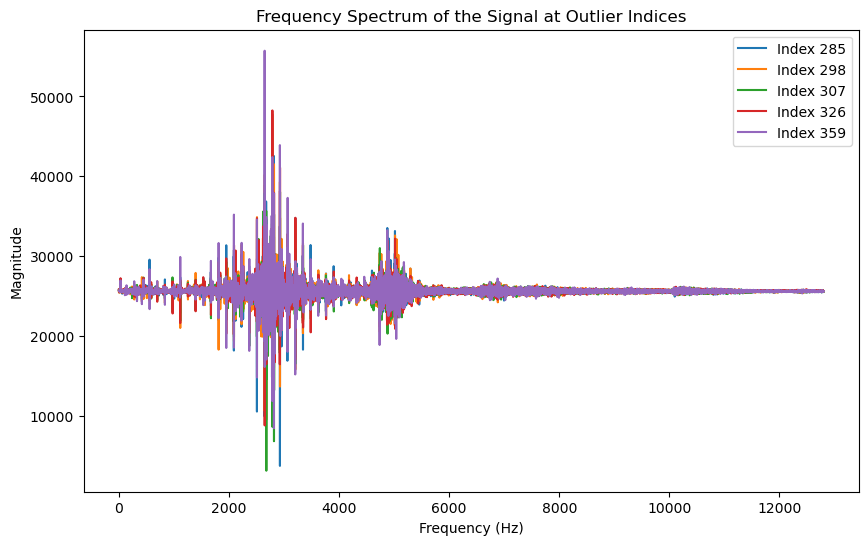

In [15]:
fs = 25600

outlier_indices = [285, 298, 307, 326, 359]

# 각 이상치 인덱스에 대해 주파수 스펙트럼을 계산하고 시각화
plt.figure(figsize=(10, 6))

for idx in outlier_indices:
    # 각 인덱스에 해당하는 데이터를 가져오기 (이 경우 sample_data가 사용됩니다)
    signal_data = data1.iloc[idx, :-1].values  # 마지막 열은 'Outlier'이므로 제외

    # 푸리에 변환을 통한 주파수 분석
    fft_result = np.fft.fft(signal_data)
    frequencies = np.fft.fftfreq(len(fft_result), 1 / fs)

    # 절대값 취해서 스펙트럼 구하기
    magnitude = np.abs(fft_result)

    # 주파수 스펙트럼 시각화 (0에서 샘플링 주파수의 절반까지)
    plt.plot(frequencies[:len(frequencies) // 2], magnitude[:len(magnitude) // 2], label=f'Index {idx}')

# 그래프 제목 및 레이블 설정
plt.title("Frequency Spectrum of the Signal at Outlier Indices")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()  # 범례 추가
plt.show()


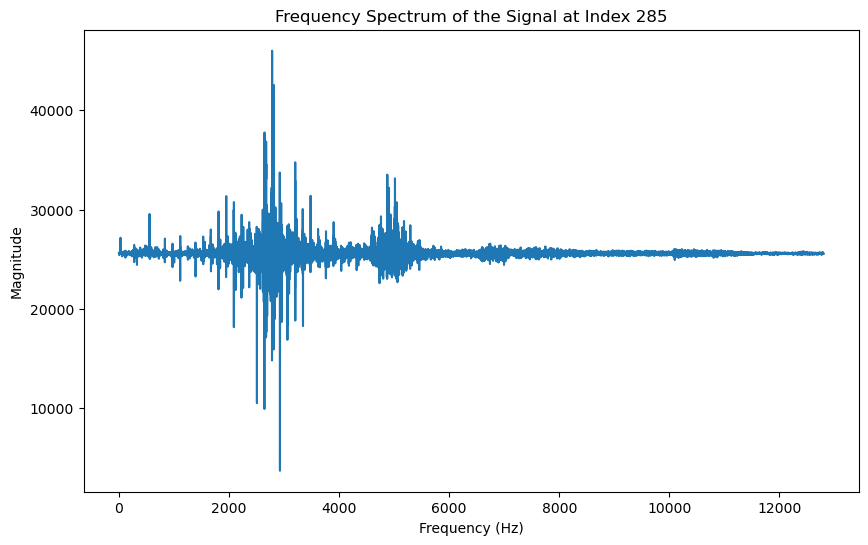

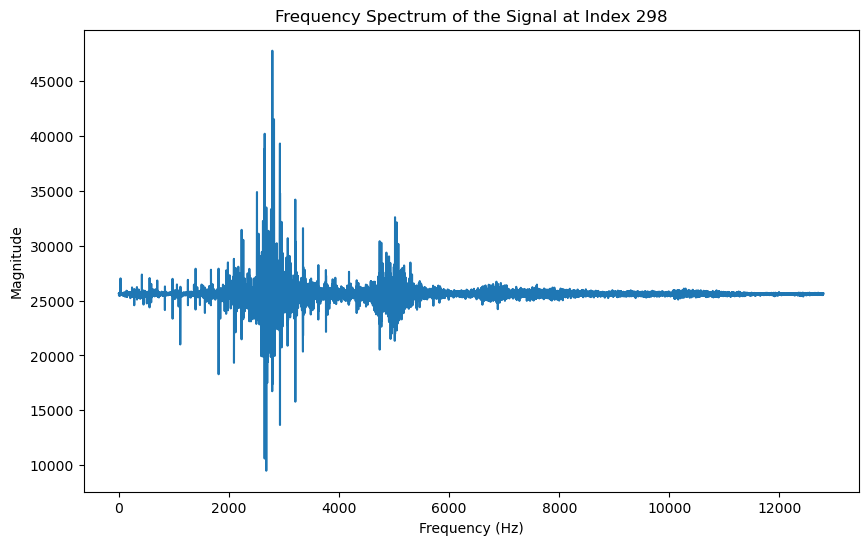

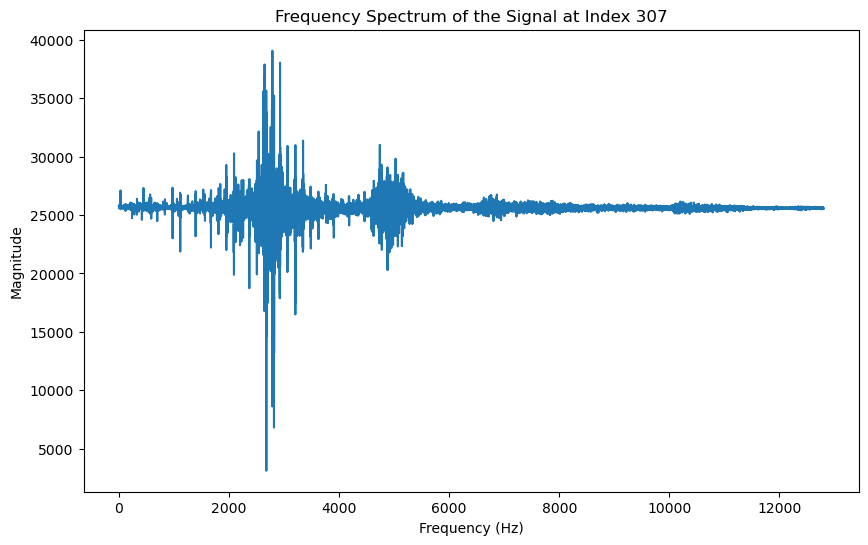

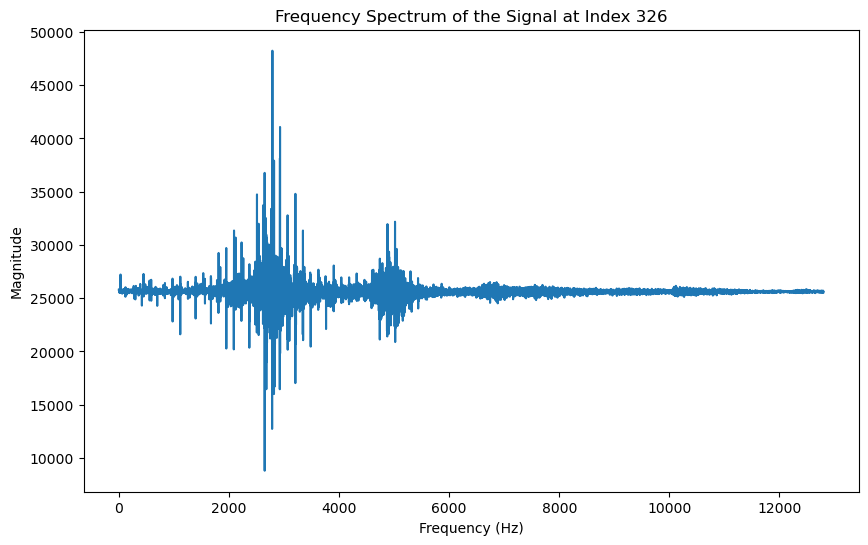

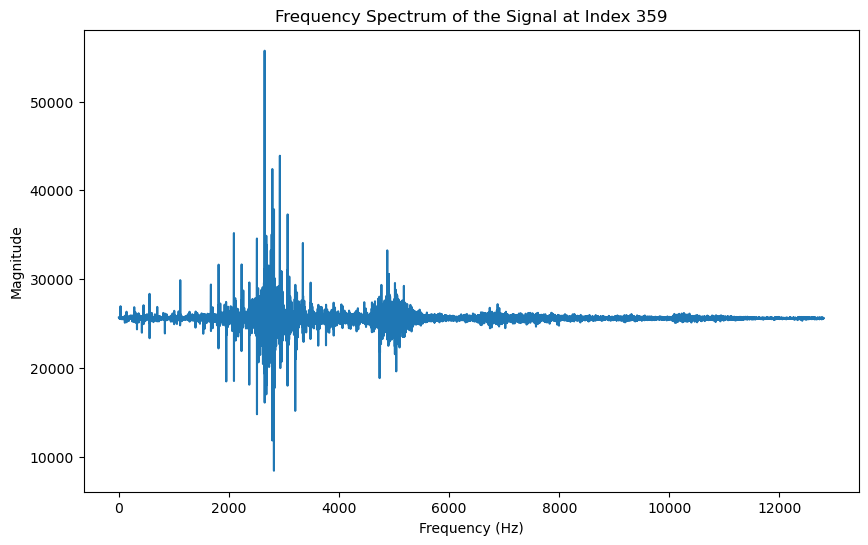

In [16]:

fs = 25600
# 이상치 인덱스
outlier_indices = [285, 298, 307, 326, 359]

# 각 이상치 인덱스에 대해 주파수 스펙트럼을 계산하고 시각화
for idx in outlier_indices:

    signal_data = data1.iloc[idx, :-1].values  # 마지막 열은 'Outlier'이므로 제외

    # 푸리에 변환을 통한 주파수 분석
    fft_result = np.fft.fft(signal_data)
    frequencies = np.fft.fftfreq(len(fft_result), 1 / fs)

    # 절대값 취해서 스펙트럼 구하기
    magnitude = np.abs(fft_result)

    # 주파수 스펙트럼 시각화 (0에서 샘플링 주파수의 절반까지)
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[:len(frequencies) // 2], magnitude[:len(magnitude) // 2])
    plt.title(f"Frequency Spectrum of the Signal at Index {idx}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


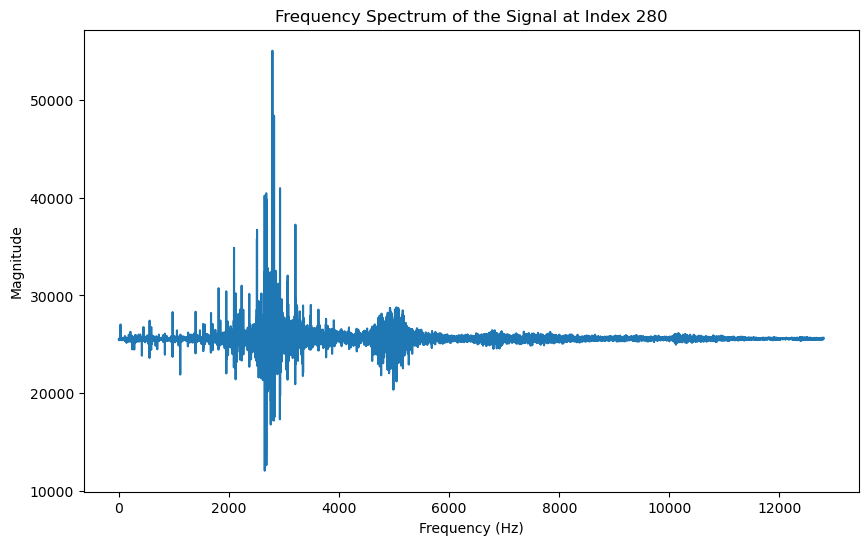

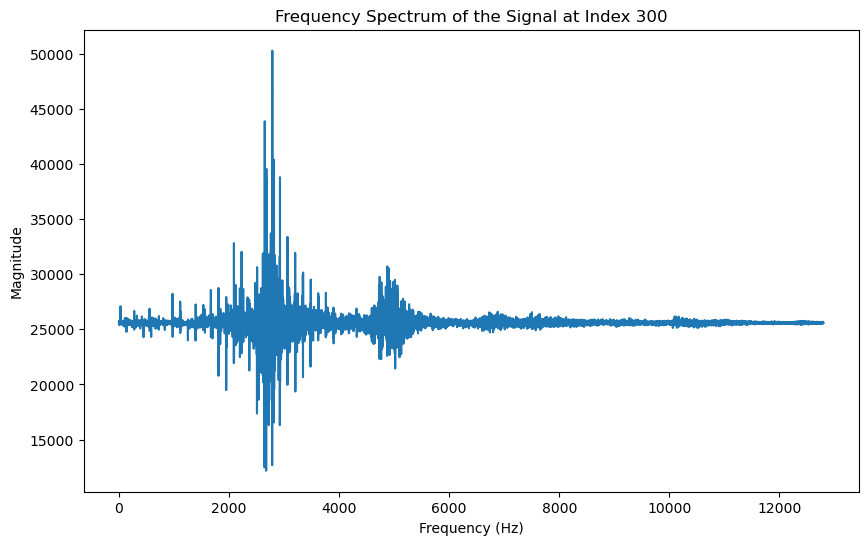

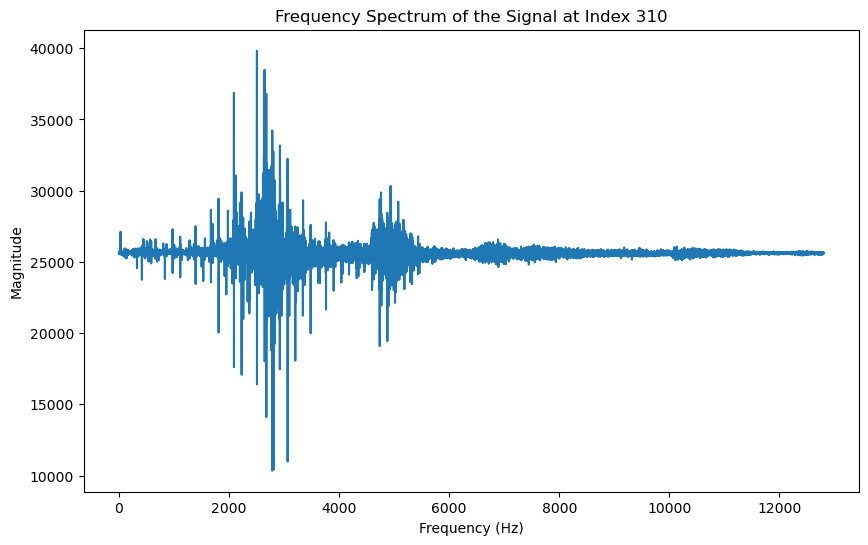

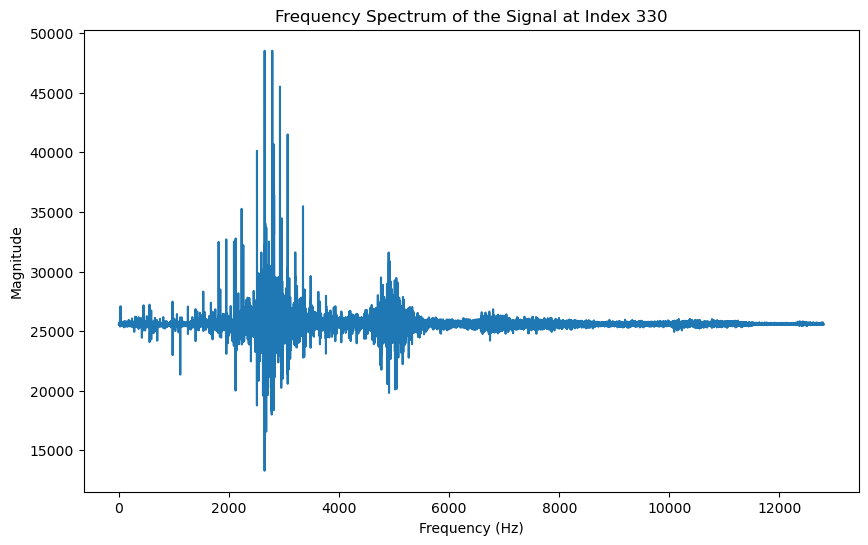

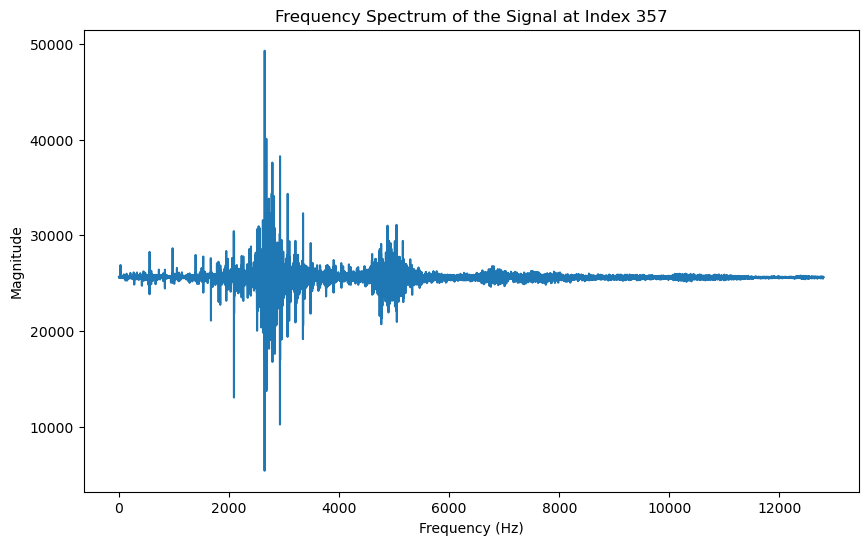

In [17]:
fs = 25600
# 이상치 인덱스 #0~119, 120~239, 240~359, 360~479
normal_indices = [280, 300, 310, 330, 357]

# 각 이상치 인덱스에 대해 주파수 스펙트럼을 계산하고 시각화
for idx in normal_indices:

    signal_data = data1.iloc[idx, :-1].values  # 마지막 열은 'Outlier'이므로 제외

    # 푸리에 변환을 통한 주파수 분석
    fft_result = np.fft.fft(signal_data)
    frequencies = np.fft.fftfreq(len(fft_result), 1 / fs)

    # 절대값 취해서 스펙트럼 구하기
    magnitude = np.abs(fft_result)

    # 주파수 스펙트럼 시각화 (0에서 샘플링 주파수의 절반까지)
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[:len(frequencies) // 2], magnitude[:len(magnitude) // 2])
    plt.title(f"Frequency Spectrum of the Signal at Index {idx}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

In [20]:
# 'outlier' 열에서 값이 -1인 데이터만 추출하여 새로운 데이터프레임 생성
outlier_df = data1[data1['Outlier'] == -1]

# outlier_df 출력 또는 필요한 작업 수행
print(outlier_df)

             0          1          2          3          4          5  \
285 -11.071723  -9.207912   4.632397  24.747423  28.784326   2.938663   
298 -24.969731  -9.799280  -2.617979   3.891822   3.086892   5.693134   
307   5.126745  34.638947  33.788218   9.947977  -9.862786 -12.615103   
326  40.101603  27.792731   5.502994 -12.501419  -9.816834  -8.627638   
359   7.158458   8.676145   6.032645   0.074397  -6.174053  -7.368402   

             6          7          8          9  ...     25593     25594  \
285 -19.481114 -18.483181  -6.597995  -1.358957  ...  1.397994 -4.255577   
298  12.463621  11.506145   6.490023 -12.898185  ... -0.026244  3.328479   
307  -6.059643 -10.110791 -10.768938  -2.744539  ... -7.800605 -7.623086   
326  -9.340517 -11.040498  -5.482281  16.648723  ... -6.545790 -4.542609   
359  -6.671374  -0.822406   2.410477   4.589608  ... -2.540112 -0.632370   

        25595     25596      25597     25598     25599     fs  fault_type  \
285 -6.405840 -8.956763  -5

In [22]:
outlier_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,25593,25594,25595,25596,25597,25598,25599,fs,fault_type,Outlier
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0
mean,3.269070,10.420126,9.467655,5.232040,1.203509,-3.995869,-5.817805,-5.790146,-2.789743,0.847330,...,-3.102952,-2.745033,-0.820440,2.457875,4.158117,3.034847,1.301478,25600.0,3.0,-1.0
std,24.383919,20.527326,14.039675,13.656164,16.298680,7.891181,11.555227,11.523752,7.045857,10.844320,...,3.998828,4.202955,4.274079,7.057488,6.226724,3.468965,3.768290,0.0,0.0,0.0
min,-24.969731,-9.799280,-2.617979,-12.501419,-9.862786,-12.615103,-19.481114,-18.483181,-10.768938,-12.898185,...,-7.800605,-7.623086,-6.405840,-8.956763,-5.680413,-0.972266,-3.670516,25600.0,3.0,-1.0
25%,-11.071723,-9.207912,4.632397,0.074397,-9.816834,-8.627638,-9.340517,-11.040498,-6.597995,-2.744539,...,-6.545790,-4.542609,-2.429610,1.581417,3.423687,-0.289275,-0.621154,25600.0,3.0,-1.0
50%,5.126745,8.676145,5.502994,3.891822,-6.174053,-7.368402,-6.671374,-10.110791,-5.482281,-1.358957,...,-2.540112,-4.255577,-0.449600,3.701023,4.250554,4.711607,1.882932,25600.0,3.0,-1.0
75%,7.158458,27.792731,6.032645,9.947977,3.086892,2.938663,-6.059643,-0.822406,2.410477,4.589608,...,-0.026244,-0.632370,-0.225109,6.309066,8.210293,4.806131,2.443540,25600.0,3.0,-1.0
max,40.101603,34.638947,33.788218,24.747423,28.784326,5.693134,12.463621,11.506145,6.490023,16.648723,...,1.397994,3.328479,5.407958,9.654631,10.586463,6.918037,6.472591,25600.0,3.0,-1.0


In [25]:
data1.loc[240:359].describe()

,0,1,2,3,4,5,6,7,8,9,...,25593,25594,25595,25596,25597,25598,25599,fs,fault_type,Outlier
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.0,120.000000
mean,0.887190,0.215126,-0.323468,0.255733,0.875089,0.270860,-0.623645,-1.170371,-0.690430,0.695546,...,0.512606,0.806664,0.273207,-0.599254,-0.613514,0.059898,0.828463,25600.0,3.0,0.916667
std,10.934891,9.913288,8.622851,9.838839,9.509379,8.171796,9.455406,9.642814,8.863745,9.369461,...,10.502795,10.003731,9.121053,10.581330,9.782269,8.928540,8.940024,0.0,0.0,0.401328
min,-36.198352,-32.121090,-31.613786,-35.722304,-28.096789,-34.826832,-30.124589,-51.215854,-40.467177,-39.305719,...,-44.367781,-33.859684,-40.813313,-40.867575,-45.524867,-47.900683,-32.878279,25600.0,3.0,-1.000000
25%,-2.365118,-3.592599,-3.168492,-2.698633,-2.438159,-3.463411,-3.511503,-3.698541,-2.278791,-2.270858,...,-4.656798,-3.231398,-3.359024,-3.726639,-4.336205,-2.612719,-2.253533,25600.0,3.0,1.000000
50%,-0.028626,0.076619,-0.288985,-0.187654,-0.011053,0.404875,0.403602,0.813000,0.757999,1.014783,...,-0.588763,-0.172856,-0.214366,-0.327137,0.021955,0.590597,0.646239,25600.0,3.0,1.000000
75%,3.501616,3.314419,3.129733,2.804387,3.166246,3.187503,4.529941,3.328263,3.416350,3.938246,...,4.085674,3.303504,2.190335,3.253610,3.305751,3.670564,3.831412,25600.0,3.0,1.000000
max,40.101603,34.638947,33.788218,35.679602,35.312310,30.207868,29.864821,34.775393,26.612906,31.812818,...,32.528763,34.401622,32.180483,33.178423,30.269982,24.035099,33.712580,25600.0,3.0,1.000000


In [26]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,25593,25594,25595,25596,25597,25598,25599,fs,fault_type,Outlier
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.0000,480.000000
mean,0.219384,0.018959,-0.123535,-0.042179,0.076013,-0.020499,-0.141481,-0.222975,-0.120856,0.179644,...,0.000497,0.145504,0.078274,-0.090376,-0.109908,0.036134,0.234343,25600.0,1.5000,0.979167
std,5.570125,5.050564,4.397461,5.112839,5.003954,4.240792,4.783558,4.966407,4.657811,4.804685,...,5.427738,5.208561,4.836265,5.396295,5.017369,4.636062,4.605510,0.0,1.1192,0.203270
min,-36.198352,-32.121090,-31.613786,-35.722304,-28.096789,-34.826832,-30.124589,-51.215854,-40.467177,-39.305719,...,-44.367781,-33.859684,-40.813313,-40.867575,-45.524867,-47.900683,-32.878279,25600.0,0.0000,-1.000000
25%,-0.389017,-0.376862,-0.441821,-0.496195,-0.487717,-0.476939,-0.415312,-0.341710,-0.336842,-0.415780,...,-0.474089,-0.496845,-0.451072,-0.424570,-0.468090,-0.378416,-0.371910,25600.0,0.7500,1.000000
50%,-0.007652,-0.035504,-0.009591,-0.018038,-0.047315,-0.053363,-0.031459,0.014490,0.018111,0.008302,...,-0.060571,-0.069125,-0.055457,-0.026873,-0.042733,-0.012165,-0.007320,25600.0,1.5000,1.000000
75%,0.337489,0.354078,0.340210,0.348077,0.326287,0.367591,0.469315,0.477535,0.474665,0.470277,...,0.309156,0.332941,0.367868,0.408239,0.403249,0.407963,0.386466,25600.0,2.2500,1.000000
max,40.101603,34.638947,33.788218,35.679602,35.312310,30.207868,29.864821,34.775393,26.612906,31.812818,...,32.528763,34.401622,32.180483,33.178423,30.269982,24.035099,33.712580,25600.0,3.0000,1.000000


In [27]:
data_copy=data1[::]

In [31]:
data_copy.drop('Outlier', axis=1)

,0,1,2,3,4,5,6,7,8,9,...,25592,25593,25594,25595,25596,25597,25598,25599,fs,fault_type
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951,25600,1
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616,25600,1
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288,25600,1
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774,25600,1
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093,25600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.276886,-0.192730,0.108058,0.079642,-0.311127,-0.221611,-0.147273,-0.174633,-0.365725,-0.381783,...,-0.133169,0.044955,0.302521,0.241121,0.043294,0.003460,-0.033871,-0.104319,25600,0
476,-0.115004,-0.141876,0.156770,0.342263,0.160012,0.018401,-0.048714,-0.215187,-0.239910,0.001983,...,0.442239,0.557199,0.383141,0.367553,0.106910,-0.074565,0.101684,-0.073845,25600,0
477,-0.240392,0.229288,0.115306,0.262058,0.342050,0.156611,-0.036038,-0.343879,-0.400363,-0.409394,...,0.128183,0.287794,0.170361,0.267327,0.142104,-0.110235,-0.285532,-0.255486,25600,0
478,-0.006846,0.094778,0.120428,0.285535,0.280125,0.027175,-0.165798,-0.301975,-0.359229,-0.233261,...,-0.270689,0.155243,0.085986,0.005096,-0.103922,-0.115395,0.294986,0.056098,25600,0


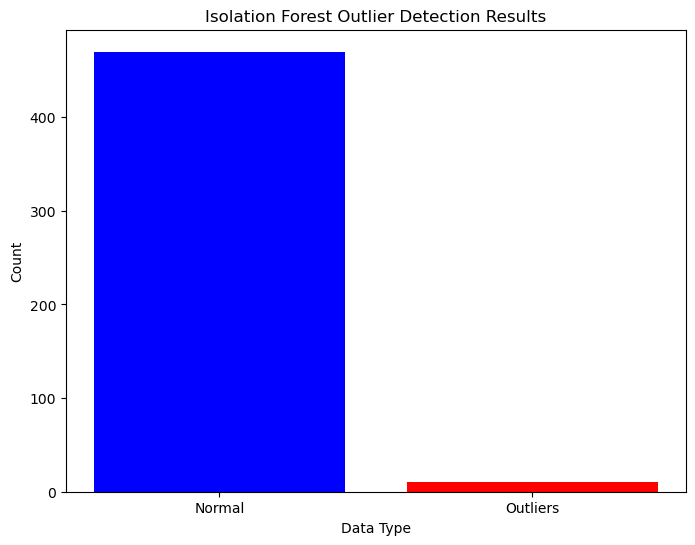

In [32]:
# Isolation Forest 모델 설정 및 학습
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 1%의 이상치 탐지
outliers = iso_forest.fit_predict(data_copy)

# 이상치 처리: 이상치(-1)와 정상치(1)로 분류된 결과를 데이터 프레임에 추가
data_copy['Outlier'] = outliers

# 이상치 데이터와 정상 데이터를 구분하여 시각화/분석 준비
outlier_002 = data_copy[data_copy['Outlier'] == -1]
normal_002 = data_copy[data_copy['Outlier'] == 1]

# 결과 반환
len(outlier_002), len(normal_002)
# 시각화 - 이상치와 정상치 개수 시각화
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Outliers'], [len(normal_002), len(outlier_002)], color=['blue', 'red'])
plt.title('Isolation Forest Outlier Detection Results')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

In [33]:
# 결과 반환
len(outlier_002), len(normal_002)

(10, 470)

In [35]:
outlier_002.index

Index([267, 273, 285, 292, 298, 307, 312, 318, 326, 359], dtype='int64')

In [34]:
outlier_002.describe()

,0,1,2,3,4,5,6,7,8,9,...,25593,25594,25595,25596,25597,25598,25599,fs,fault_type,Outlier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
mean,3.964369,5.380319,2.803904,-0.194508,-2.336261,-2.998133,-1.638952,-0.633684,1.183789,2.368312,...,-4.277784,-1.882388,1.005570,3.872417,4.038629,2.445982,1.516300,25600.0,3.0,-1.0
std,17.234529,15.108346,12.752769,11.784828,12.525866,6.135952,9.628458,9.976428,7.502016,8.246705,...,7.636941,3.516430,9.229730,11.581353,7.268234,2.470655,3.015335,0.0,0.0,0.0
min,-24.969731,-9.799280,-14.343341,-17.377011,-18.607989,-12.615103,-19.481114,-18.483181,-10.768938,-12.898185,...,-24.153878,-7.623086,-6.405840,-8.956763,-5.680413,-0.972266,-3.670516,25600.0,3.0,-1.0
25%,-3.040881,-4.890118,-3.743147,-5.927967,-8.906139,-7.295915,-6.555602,-8.312099,-3.947193,-2.068020,...,-5.756429,-4.012540,-3.287048,-1.776837,-0.731803,0.795872,-0.100259,25600.0,3.0,-1.0
50%,4.213163,1.053421,1.218368,-1.246354,-4.678081,-3.624772,-3.015355,0.831757,1.740454,2.099470,...,-1.530569,-2.084524,-1.309650,1.033223,3.022870,2.433138,2.163236,25600.0,3.0,-1.0
75%,6.652767,8.621098,5.900233,3.316475,0.119650,2.335173,6.359469,7.004936,4.736381,5.144911,...,-0.003581,-0.883475,-0.281232,5.657055,7.220358,4.203648,3.169613,25600.0,3.0,-1.0
max,40.101603,34.638947,33.788218,24.747423,28.784326,5.693134,12.463621,11.506145,15.610370,16.648723,...,1.397994,3.990552,25.606578,33.178423,19.496149,6.918037,6.472591,25600.0,3.0,-1.0


In [37]:
outlier_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,25593,25594,25595,25596,25597,25598,25599,fs,fault_type,Outlier
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0
mean,3.269070,10.420126,9.467655,5.232040,1.203509,-3.995869,-5.817805,-5.790146,-2.789743,0.847330,...,-3.102952,-2.745033,-0.820440,2.457875,4.158117,3.034847,1.301478,25600.0,3.0,-1.0
std,24.383919,20.527326,14.039675,13.656164,16.298680,7.891181,11.555227,11.523752,7.045857,10.844320,...,3.998828,4.202955,4.274079,7.057488,6.226724,3.468965,3.768290,0.0,0.0,0.0
min,-24.969731,-9.799280,-2.617979,-12.501419,-9.862786,-12.615103,-19.481114,-18.483181,-10.768938,-12.898185,...,-7.800605,-7.623086,-6.405840,-8.956763,-5.680413,-0.972266,-3.670516,25600.0,3.0,-1.0
25%,-11.071723,-9.207912,4.632397,0.074397,-9.816834,-8.627638,-9.340517,-11.040498,-6.597995,-2.744539,...,-6.545790,-4.542609,-2.429610,1.581417,3.423687,-0.289275,-0.621154,25600.0,3.0,-1.0
50%,5.126745,8.676145,5.502994,3.891822,-6.174053,-7.368402,-6.671374,-10.110791,-5.482281,-1.358957,...,-2.540112,-4.255577,-0.449600,3.701023,4.250554,4.711607,1.882932,25600.0,3.0,-1.0
75%,7.158458,27.792731,6.032645,9.947977,3.086892,2.938663,-6.059643,-0.822406,2.410477,4.589608,...,-0.026244,-0.632370,-0.225109,6.309066,8.210293,4.806131,2.443540,25600.0,3.0,-1.0
max,40.101603,34.638947,33.788218,24.747423,28.784326,5.693134,12.463621,11.506145,6.490023,16.648723,...,1.397994,3.328479,5.407958,9.654631,10.586463,6.918037,6.472591,25600.0,3.0,-1.0


In [36]:
data1.loc[240:359].describe()

,0,1,2,3,4,5,6,7,8,9,...,25593,25594,25595,25596,25597,25598,25599,fs,fault_type,Outlier
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.0,120.000000
mean,0.887190,0.215126,-0.323468,0.255733,0.875089,0.270860,-0.623645,-1.170371,-0.690430,0.695546,...,0.512606,0.806664,0.273207,-0.599254,-0.613514,0.059898,0.828463,25600.0,3.0,0.916667
std,10.934891,9.913288,8.622851,9.838839,9.509379,8.171796,9.455406,9.642814,8.863745,9.369461,...,10.502795,10.003731,9.121053,10.581330,9.782269,8.928540,8.940024,0.0,0.0,0.401328
min,-36.198352,-32.121090,-31.613786,-35.722304,-28.096789,-34.826832,-30.124589,-51.215854,-40.467177,-39.305719,...,-44.367781,-33.859684,-40.813313,-40.867575,-45.524867,-47.900683,-32.878279,25600.0,3.0,-1.000000
25%,-2.365118,-3.592599,-3.168492,-2.698633,-2.438159,-3.463411,-3.511503,-3.698541,-2.278791,-2.270858,...,-4.656798,-3.231398,-3.359024,-3.726639,-4.336205,-2.612719,-2.253533,25600.0,3.0,1.000000
50%,-0.028626,0.076619,-0.288985,-0.187654,-0.011053,0.404875,0.403602,0.813000,0.757999,1.014783,...,-0.588763,-0.172856,-0.214366,-0.327137,0.021955,0.590597,0.646239,25600.0,3.0,1.000000
75%,3.501616,3.314419,3.129733,2.804387,3.166246,3.187503,4.529941,3.328263,3.416350,3.938246,...,4.085674,3.303504,2.190335,3.253610,3.305751,3.670564,3.831412,25600.0,3.0,1.000000
max,40.101603,34.638947,33.788218,35.679602,35.312310,30.207868,29.864821,34.775393,26.612906,31.812818,...,32.528763,34.401622,32.180483,33.178423,30.269982,24.035099,33.712580,25600.0,3.0,1.000000


## 시간영역분석

In [22]:
data1

,0,1,2,3,4,5,6,7,8,9,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,fault_type
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.071124,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951,1
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,-0.246382,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616,1
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,-0.197872,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288,1
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.855152,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774,1
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.257708,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.276886,-0.192730,0.108058,0.079642,-0.311127,-0.221611,-0.147273,-0.174633,-0.365725,-0.381783,...,-0.094367,-0.133169,0.044955,0.302521,0.241121,0.043294,0.003460,-0.033871,-0.104319,0
476,-0.115004,-0.141876,0.156770,0.342263,0.160012,0.018401,-0.048714,-0.215187,-0.239910,0.001983,...,0.398198,0.442239,0.557199,0.383141,0.367553,0.106910,-0.074565,0.101684,-0.073845,0
477,-0.240392,0.229288,0.115306,0.262058,0.342050,0.156611,-0.036038,-0.343879,-0.400363,-0.409394,...,0.057502,0.128183,0.287794,0.170361,0.267327,0.142104,-0.110235,-0.285532,-0.255486,0
478,-0.006846,0.094778,0.120428,0.285535,0.280125,0.027175,-0.165798,-0.301975,-0.359229,-0.233261,...,-0.683152,-0.270689,0.155243,0.085986,0.005096,-0.103922,-0.115395,0.294986,0.056098,0


In [23]:
data1.loc[122:124]

,0,1,2,3,4,5,6,7,8,9,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,fault_type
122,-0.888611,-1.152014,-1.377244,-0.902960,-0.232424,0.766462,0.580639,0.159994,-0.212116,-1.052789,...,0.201537,0.339345,0.586818,0.357497,-0.357049,-0.386369,-0.251401,0.502192,0.495085,2
123,0.759916,0.941019,0.782300,0.591995,0.447374,0.548828,-0.260517,0.049962,0.648321,0.657278,...,-0.512862,0.565918,-0.010876,-0.333426,-0.370763,-0.862063,-0.779886,-1.841997,-1.226608,2
124,-0.494801,-0.736639,0.675156,0.365453,-0.574304,-0.588714,-2.339122,-0.517435,-0.567631,-0.777981,...,-0.377888,-0.153360,0.125423,-0.061994,-0.650834,-0.086014,-0.278333,-0.303086,-0.112409,2


In [10]:
data1=data1.drop('fault_type',axis=1)

In [11]:
data1.shape

(480, 25600)

Mean: 2.844836354726009e-05
Max: 39.31265773739
Min: -42.172274355350005
Standard Deviation: 2.3608642258943666
RMS: 2.3608642260657677


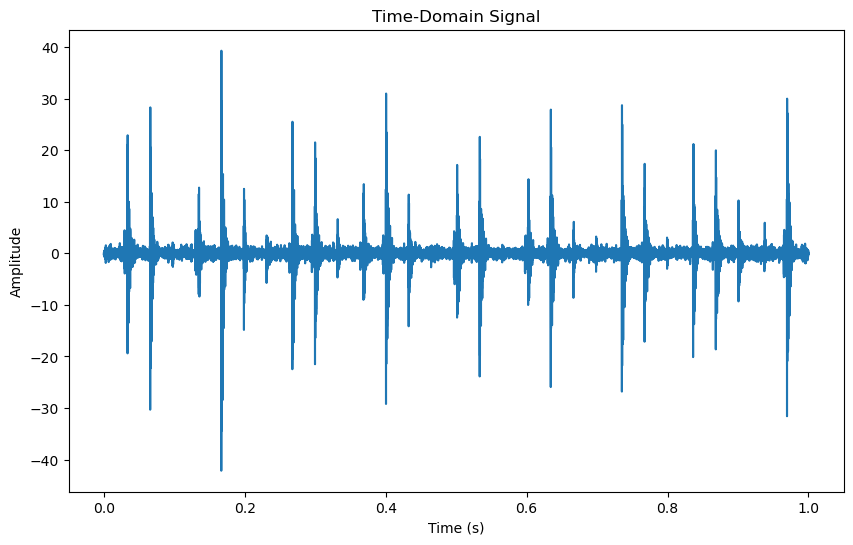

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 가정: data1은 480개의 베어링 데이터가 있는 DataFrame (각 열이 25600개의 값)
# data1에서 1초간 진동한 데이터 중 첫 번째 데이터를 signal로 사용
signal = data1.iloc[0].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

# 샘플링 주파수 (25600 Hz, 즉 1초에 25600개의 데이터)
fs = 25600
t = np.arange(0, 1, 1/fs)  # 0초부터 1초까지 25600개의 샘플

# 시간영역에서 신호 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()



In [13]:
signal = data1.iloc[1].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: -0.006530319445551579
Max: 38.0115975254
Min: -51.21585390816001
Standard Deviation: 3.405400216934948
RMS: 3.405406478318359


In [14]:
signal = data1.iloc[2].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: 0.002405359512234361
Max: 46.86015878441
Min: -51.21585390816001
Standard Deviation: 3.9273995525058782
RMS: 3.9274002890942703


In [15]:
signal = data1.iloc[3].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: -1.2377295141817456e-05
Max: 51.22196212239
Min: -49.17074456397
Standard Deviation: 3.492657032394639
RMS: 3.49265703241657


In [16]:
signal = data1.iloc[5].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: 0.000986384526900385
Max: 35.98214948126
Min: -40.20692468467001
Standard Deviation: 2.1854369198661865
RMS: 2.1854371424656986


In [17]:
signal = data1.iloc[122].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: -0.0006033948425574229
Max: 21.08064534429
Min: -26.22897321213
Standard Deviation: 1.2416961727625873
RMS: 1.2416963193706394


In [18]:
signal = data1.iloc[250].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: 0.00304489575003236
Max: 47.61257282151
Min: -51.21585390816001
Standard Deviation: 7.651732767645228
RMS: 7.65173337348119


In [19]:
signal = data1.iloc[367].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: 0.0001027085986390637
Max: 1.59460548551
Min: -1.76562565898
Standard Deviation: 0.3174830505403677
RMS: 0.31748306715394115


In [24]:
signal = data1.iloc[400].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: -0.00015658254934338434
Max: 1.55213985516
Min: -1.3699473399000002
Standard Deviation: 0.3071625812263982
RMS: 0.3071626211370102


In [25]:
signal = data1.iloc[410].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: 4.375067163899937e-05
Max: 1.34113054973
Min: -1.41394551852
Standard Deviation: 0.296647824719709
RMS: 0.296647827945961


In [20]:
signal = data1.iloc[258].values  # data1의 첫 번째 row를 signal로 사용 (길이가 25600)

# 시간영역 분석: 평균, 최대, 최소, 표준편차 등
mean_value = np.mean(signal)  # 평균
max_value = np.max(signal)    # 최대값
min_value = np.min(signal)    # 최소값
std_deviation = np.std(signal)  # 표준편차
rms_value = np.sqrt(np.mean(signal**2))  # RMS 값

# 시간영역 분석 결과 출력
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"RMS: {rms_value}")

Mean: 0.00370527055152846
Max: 41.17311027947
Min: -51.21585390816001
Standard Deviation: 7.755751313554451
RMS: 7.755752198641435
